# Mottonen State Preparation

In [1]:
from typing import List

In [2]:
import numpy as np

In [4]:
def get_uniform_controlled_rotation(k: int, m: int, a: List, alpha: List[float]):
    # if k == 0:
        
    pass

In [5]:
def binary_to_gray_code(n: int):
    return n ^ (n >> 1)

In [6]:
def construct_M_matrix(k: int) -> np.array:
    """
    Constructs the M matrix used to convert {alpha_i} to {theta_i}.
    The M matrix has size 2^k x 2^k.
    """
    
    ms = np.arange(2**k).reshape(-1, 2**k,)
    gs = binary_to_gray_code(ms)
    M = gs.T & ms
    M = (-1) ** M
    M = 2**(-k) * M
    
    return M

construct_M_matrix(2)

array([[ 0.25,  0.25,  0.25,  0.25],
       [ 0.25, -0.25,  0.25, -0.25],
       [ 0.25, -0.25,  0.25, -0.25],
       [ 0.25,  0.25,  0.25,  0.25]])

In [15]:
from qiskit import QuantumRegister, QuantumCircuit

In [29]:
a = np.ones(2)
a[1] = 2
a

array([1., 2.])

j: 4
[0. 0. 0. 0. 0. 0. 0. 0.]
[3, 2, 3, 1, 3, 2, 3, 1]


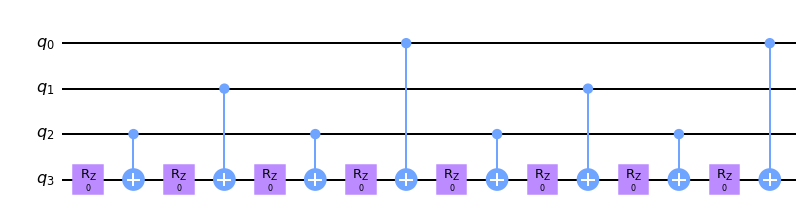

j: 3
[0. 0. 0. 0.]
[2, 1, 2, 1]


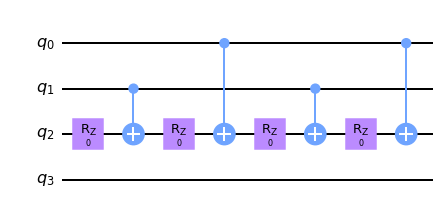

j: 2
[0. 0.]
[1, 1]


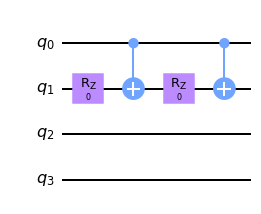

j: 1
[0.]
[0]


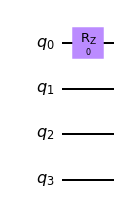

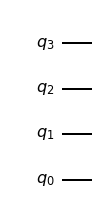

In [58]:
def state_prep(input_vector: List[float]):
    """
    input_vector: List, array that contain float values of size 2^n
    Return the mottonen state preparation of the input_vector
    """

    # use a framework that works with quantum circuits, qiskit, cirq, pennylane, etc. 
    # define a quantum circuit to convert the vector in a quantum circuit
    n = int(np.ceil(np.log2(len(input_vector))))
    
    # create the circuit
    qc = QuantumCircuit(n)
    
    # first we get the a_i and omega_i values
    a_i = np.abs(input_vector)
    omega_i = np.angle(input_vector)
    
    def get_alpha_zk(n, k, omega_i):
        j_max = 2 ** (n - k)
        alpha_zk = np.ones(j_max)
        for j in range(j_max):
            l_max = 2 ** (k - 1)
            alpha_zjk = np.ones(l_max)
            for l in range(l_max):
                upper_ind = ((2 * j) + 1) * l_max + l
                lower_ind = upper_ind - l_max
                alpha_zjk[l] = omega_i[upper_ind] - omega_i[lower_ind]
            alpha_zk[j] = np.sum(alpha_zjk) / l_max

        return alpha_zk
    
    def get_control_qubits(j):
        if j == 1:
            return [0]
        else:
            cqubits_prev = get_control_qubits(j - 1)
            
            cqubits = [qbit + 1 for qbit in cqubits_prev]
            cqubits[-1] = 1
            cqubits = cqubits * 2
            return cqubits
    
    def get_uniform_controlled_rz_gate(n, j, omega_i):
        k = n - j + 1
        alpha_zk = get_alpha_zk(n, k, omega_i)
        control_qubits = get_control_qubits(j)
        
        assert len(alpha_zk) == len(control_qubits)
        assert len(alpha_zk) + len(control_qubits) == 2 ** j
        print(alpha_zk)
        print(control_qubits)
        
        # assemble the unitary
        unitary = QuantumCircuit(n)
        for i in range(len(alpha_zk)):
            unitary.rz(alpha_zk[i], j - 1)
            if control_qubits[i] != 0:
                unitary.cx(control_qubits[i] - 1, j - 1)
        
        display(unitary.draw(output="mpl"))
        return unitary
    
    for j in range(n, 0, -1):
        print("j:", j)
        # qc.append(
        get_uniform_controlled_rz_gate(n, j, omega_i)
        # )

    # define the Mottonen state


    # consider print your quantum circuit
    display(qc.draw(output='mpl', reverse_bits=True))

state_prep(np.random.randint(5, size=16))